In [14]:
%load_ext autoreload
%autoreload 2

from Satellite import Satellite
from SatelliteState import SatelliteState
from Earth import Earth

import numpy as np

import matplotlib.pyplot as plt


init_r = 6378136.6+200000
angular_vel = 0.001454
tang_vel = angular_vel * init_r
tang_vel = 60 * 4.848e-6 * init_r

sat_state1 = SatelliteState(np.array([init_r, np.pi/2, 0]), np.array([0]), np.array([0, tang_vel, 0]), np.array([0]))

earth = Earth()


sat1 = Satellite(sat_state1, 0, earth=earth)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
tang_vel

1913.4483742079997

In [16]:
sat1.true_state

SatelliteState(pos=array([6.57813660e+06, 1.57079633e+00, 0.00000000e+00]), cov=array([0]), velocity=array([   0.        , 1913.44837421,    0.        ]), acceleration=array([0]))

In [17]:
sat1.true_state.get_state_sat_plane()

array([6.57813660e+06, 0.00000000e+00, 1.57079633e+00, 1.91344837e+03])

In [18]:
sat1.d_state(0, sat1.true_state.get_state_sat_plane())

array([ 0.00000000e+00, -8.65499960e+00,  2.90880000e-04, -2.46467629e-06])

In [19]:
sat1.plane_to_altitude(init_r, np.pi/2)['distance']

221384.69999999925

In [20]:
sol = sat1.simulate(10000000)

In [21]:
sol

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  1.000e+00 ...  9.470e+02  9.480e+02]
        y: [[ 6.578e+06  6.578e+06 ...  1.804e+05  1.064e+05]
            [ 0.000e+00 -8.655e+00 ... -6.562e+04 -8.589e+04]
            [ 1.571e+00  1.571e+00 ...  1.634e+00  1.634e+00]
            [ 1.913e+03  1.913e+03 ...  5.301e-01  3.127e-01]]
      sol: None
 t_events: [array([], dtype=float64)]
 y_events: [array([], dtype=float64)]
     nfev: 734
     njev: 0
      nlu: 0

In [22]:
sol.y[0]

array([6578136.6       , 6578132.27249829, 6578119.28998069,
       6578097.6524097 , 6578067.35972288, 6578028.41183289,
       6577980.80862738, 6577924.54996901, 6577859.63569545,
       6577786.06561938, 6577703.83952846, 6577612.95718537,
       6577513.4183278 , 6577405.22266843, 6577288.36989496,
       6577162.85967006, 6577028.69163145, 6576885.86539183,
       6576734.38053889, 6576574.23663534, 6576405.43321891,
       6576227.9698023 , 6576041.84587324, 6575847.06089277,
       6575643.61429548, 6575431.50549515, 6575210.7338804 ,
       6574981.29881459, 6574743.19963578, 6574496.43565675,
       6574241.00616499, 6573976.91042271, 6573704.14766683,
       6573422.71710898, 6573132.6179355 , 6572833.84930746,
       6572526.41036063, 6572210.30020549, 6571885.51792725,
       6571552.06258582, 6571209.93321582, 6570859.1288266 ,
       6570499.64840221, 6570131.49090142, 6569754.65525772,
       6569369.14037928, 6568974.94514903, 6568572.06842459,
       6568160.50903829,

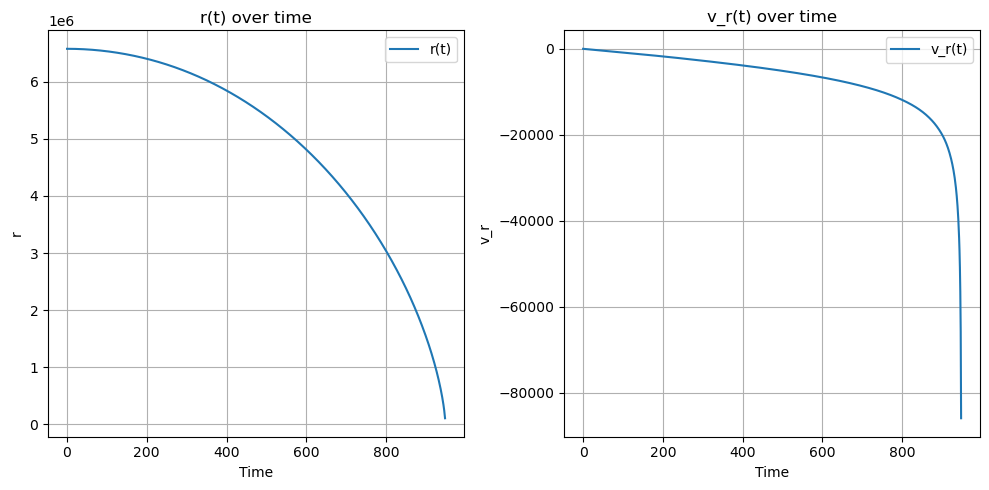

In [23]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='r(t)')
plt.title('r(t) over time')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='v_r(t)')
plt.title('v_r(t) over time')
plt.xlabel('Time')
plt.ylabel('v_r')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

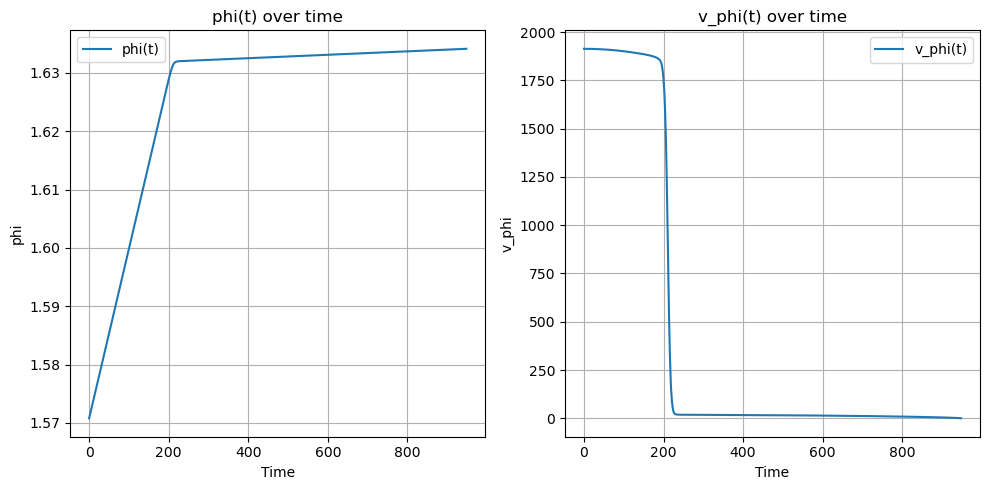

In [29]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[2], label='phi(t)')
plt.title('phi(t) over time')
plt.xlabel('Time')
plt.ylabel('phi')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[3], label='v_phi(t)')
plt.title('v_phi(t) over time')
plt.xlabel('Time')
plt.ylabel('v_phi')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
sol.y[2]

array([1.57079633, 1.57108721, 1.57137809, 1.57166897, 1.57195985,
       1.57225073, 1.57254161, 1.57283249, 1.57312337, 1.57341425,
       1.57370513, 1.57399601, 1.57428689, 1.57457777, 1.57486865,
       1.57515953, 1.57545041, 1.57574129, 1.57603217, 1.57632305,
       1.57661393, 1.57690481, 1.57719569, 1.57748657, 1.57777745,
       1.57806833, 1.57835921, 1.57865009, 1.57894097, 1.57923185,
       1.57952273, 1.57981361, 1.58010449, 1.58039537, 1.58068625,
       1.58097713, 1.58126801, 1.58155889, 1.58184977, 1.58214065,
       1.58243153, 1.58272241, 1.58301329, 1.58330417, 1.58359505,
       1.58388593, 1.58417681, 1.58446769, 1.58475857, 1.58504945,
       1.58534033, 1.58563121, 1.58592209, 1.58621297, 1.58650385,
       1.58679473, 1.58708561, 1.58737649, 1.58766737, 1.58795825,
       1.58824913, 1.58854001, 1.58883089, 1.58912177, 1.58941265,
       1.58970353, 1.58999441, 1.59028529, 1.59057617, 1.59086705,
       1.59115793, 1.59144881, 1.59173969, 1.59203057, 1.59232

In [34]:
len(sol.y[0])

949

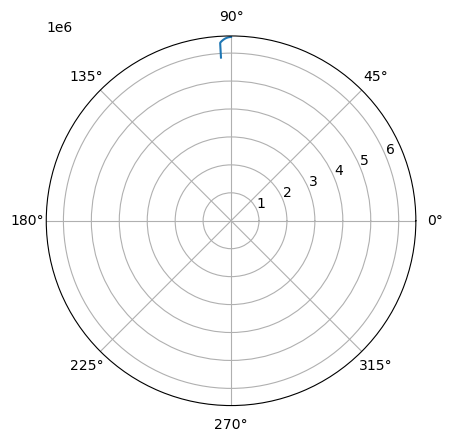

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

R = sol.y[0][:400]
rad = sol.y[2][:400]
Phi = [np.pi/2 for i in rad]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(rad, R)

plt.show()

In [46]:
sol.y.T

array([[ 6.57813660e+06,  0.00000000e+00,  1.57079633e+00,
         1.91344837e+03],
       [ 6.57813227e+06, -8.65500463e+00,  1.57108721e+00,
         1.91344711e+03],
       [ 6.57811929e+06, -1.73100342e+01,  1.57137809e+00,
         1.91344333e+03],
       ...,
       [ 2.41049531e+05, -5.65170526e+04,  1.63412058e+00,
         7.08192252e-01],
       [ 1.80416125e+05, -6.56201077e+04,  1.63412352e+00,
         5.30054139e-01],
       [ 1.06436371e+05, -8.58893671e+04,  1.63412646e+00,
         3.12705081e-01]])

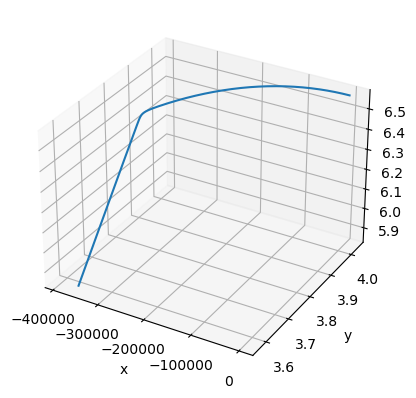

In [56]:
X = R*np.sin(rad)*np.cos(Phi)
Y = R*np.sin(rad)*np.sin(Phi)
Z = R*np.cos(rad)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot3D(Z,
    X, Y)

#ax.set_aspect('equal')
ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')
plt.show()

In [53]:
rad

array([6578136.6       , 6578132.27249829, 6578119.28998069,
       6578097.6524097 , 6578067.35972288, 6578028.41183289,
       6577980.80862738, 6577924.54996901, 6577859.63569545,
       6577786.06561938, 6577703.83952846, 6577612.95718537,
       6577513.4183278 , 6577405.22266843, 6577288.36989496,
       6577162.85967006, 6577028.69163145, 6576885.86539183,
       6576734.38053889, 6576574.23663534, 6576405.43321891,
       6576227.9698023 , 6576041.84587324, 6575847.06089277,
       6575643.61429548, 6575431.50549515, 6575210.7338804 ,
       6574981.29881459, 6574743.19963578, 6574496.43565675,
       6574241.00616499, 6573976.91042271, 6573704.14766683,
       6573422.71710898, 6573132.6179355 , 6572833.84930746,
       6572526.41036063, 6572210.30020549, 6571885.51792725,
       6571552.06258582, 6571209.93321582, 6570859.1288266 ,
       6570499.64840221, 6570131.49090142, 6569754.65525772,
       6569369.14037928, 6568974.94514903, 6568572.06842459,
       6568160.50903829,

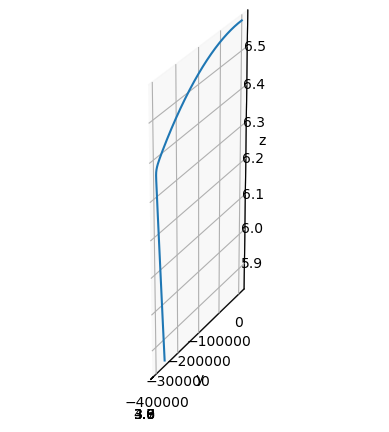

In [57]:
X, Y, Z = X, Z, Y

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot3D(
    X, Y, Z)

ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')
ax.set_aspect('equal')
plt.show()